# **<h3 align="center">Data Mining</h3>**
## **<h3 align="center">Customer Segmentation</h3>**

**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>

# Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Dataset](#chapter2)
* [3. Description of the Dataset’s Structure](#chapter3)
* [4. Exploring the Dataset](#chapter4)
    * [4.1. Identification and Treatment of Possible Data Inconsistencies](#section_4_1)
        * [4.1.1. Duplicates](#sub_section_4_1_1)
        * [4.1.2. Constant Feature](#sub_section_4_1_2)
        * [4.1.3. Missing Values](#sub_section_4_1_3)
    * [4.2. Features’ Transformation](#section_4_2)
        * [4.2.1. Total Cuisine Spending](#sub_section_4_2_1)
        * [4.2.2. Weekend and weekday orders](##sub_section_4_2_2)
        * [4.2.3. Generation](#sub_section_4_2_3)
        * [4.2.4. Hourly Order Agg. - dawn, morning, afternoon and evening](#sub_section_4_2_4)
        * [4.2.5. Healthiness Index](#sub_section_4_2_5)
        * [4.2.5. Last Promotion Indicator](#sub_section_4_2_5)
* [5. Visualization](#chapter5)
    * [5.1. Outliers](#section_5_1)
    * [5.2. Correlation Matrix](#section_5_2)



# 1. Import the Libraries <a class="anchor" id="chapter1"></a> 
For tasks involving data manipulation, numerical calculations, visualization, and machine learning, imports of libraries like the mentioned in the below cell are crucial. These libraries offer the required functions and tools for preprocessing data, pattern analysis, consumer segmentation, and development of focused marketing campaigns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Import the Dataset <a class="anchor" id="chapter2"></a>
In this section, we import the datasets and set the customer_id as the index column in DM2425_ABCDEats_DATASET.

In [2]:
df = pd.read_csv('../Data/DM2425_ABCDEats_DATASET.csv', index_col=0)
df.head(5).T

customer_id,1b8f824d5e,5d272b9dcb,f6d1b2ba63,180c632ed8,4eb37a6705
customer_region,2360,8670,4660,4660,4660
customer_age,18.0,17.0,38.0,NaN,20.0
vendor_count,2,2,1,2,2
product_count,5,2,2,3,5
is_chain,1,2,2,1,0
first_order,0.0,0.0,0.0,0.0,0.0
last_order,1,1,1,2,2
last_promo,DELIVERY,DISCOUNT,DISCOUNT,DELIVERY,-
payment_method,DIGI,DIGI,CASH,DIGI,DIGI
CUI_American,0.0,12.82,9.2,0.0,14.57


# 3. Description of the Dataset’s Structure<a class="anchor" id="chapter3"></a>
The <span style='color:Blue'> info()  </span> method prints information about the DataFrame. Using this method we can also see that there are some missing values.
*Notes*:
- customer_age has some missing values
- first_order has some missing values
- HR_0 has some missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Notes:
- customer age should be a integer
- first and last order are number of days so should be a integer

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data. The features: *customer_name*, *customer_gender*, and *customer_birthdate* don't have any statistical data since they're categorical features.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


As we can see the HR_0 is always equal to zero, so we can delete this features. 

In [5]:
columns = ['last_promo', 'payment_method']
df[columns].describe()

,last_promo,payment_method
count,31888,31888
unique,4,3
top,-,CARD
freq,16748,20161


In [6]:
df['last_promo'].value_counts()

-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: last_promo, dtype: int64

Lets replace the - for None.

In [7]:
df['last_promo'].replace('-', 'NONE', inplace=True)


To ensure data integrity by maintaining the integrity of the original data, reproducibility by enabling iterative analysis and validation of the transformations without changing the original data, it is necessary to make a copy of the original dataset before applying transformations, for that we use the <span style='color:Blue'> copy()  </span> method.

In [8]:
df_copy= df.copy()

# 4. Exploring the Dataset <a class="anchor" id="chapter4"></a>
In this section we perform several checks and treatments to ensure data quality. <br>
This entails locating and managing duplicates to prevent redundant data, removing constant characteristics that don't offer insightful information, and dealing with missing values using methods like imputation or exclusion. These procedures are essential for preserving data integrity and enhancing the accuracy of later analysis and modeling efforts.
## 4.1. Identification and Treatment of Possible Data Inconsistencies <a class="anchor" id="section_4_1"></a>
In this section we perform several checks and treatments to ensure data quality. <br>
This entails locating and managing duplicates to prevent redundant data, removing constant characteristics that don't offer insightful information, and dealing with missing values using methods like imputation or exclusion. These procedures are essential for preserving data integrity and enhancing the accuracy of later analysis and modeling efforts.
> ## 4.1.1. Duplicates <a class="anchor" id="sub_section_4_1_1"></a>
With the <span style='color:Blue'> drop_duplicates() </span> method the duplicates rows will be dropped. We can conclude that that this dataset had some duplicates (31888-31828).

In [9]:
df_copy.shape #number of rows and columns before applyig the method

(31888, 55)

In [10]:
df_copy.drop_duplicates(inplace= True)
df_copy.shape

(31828, 55)

> ## 4.1.2. Constant features <a class="anchor" id="sub_section_4_1_2"></a>
The <span style='color:Blue'> var() </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0).

In [11]:
df_copy.var()

C:\Users\xandg\AppData\Local\Temp\ipykernel_15624\2514488244.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.var()


customer_age                 51.324922
vendor_count                  7.684597
product_count                48.406888
is_chain                     15.823944
first_order                 580.874294
last_order                  539.710501
CUI_American                135.789007
CUI_Asian                   555.608208
CUI_Beverages                71.752605
CUI_Cafe                     41.381248
CUI_Chicken Dishes           13.395653
CUI_Chinese                  67.177287
CUI_Desserts                 27.638746
CUI_Healthy                  34.058152
CUI_Indian                   55.401516
CUI_Italian                 126.649056
CUI_Japanese                103.688387
CUI_Noodle Dishes            20.615043
CUI_OTHER                    95.564750
CUI_Street Food / Snacks    240.946814
CUI_Thai                     19.672079
DOW_0                         1.027102
DOW_1                         1.090735
DOW_2                         1.093430
DOW_3                         1.144752
DOW_4                    

In [12]:
df_copy.drop('HR_0', axis = 1, inplace = True)

> ## 4.1.3. Missing values <a class="anchor" id="sub_section_4_1_3"></a>

As we conclude there are some features that have some missing values. In this subsection we will check for each feature and try to understand what would be the best approach.

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31828 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31828 non-null  object 
 1   customer_age              31101 non-null  float64
 2   vendor_count              31828 non-null  int64  
 3   product_count             31828 non-null  int64  
 4   is_chain                  31828 non-null  int64  
 5   first_order               31722 non-null  float64
 6   last_order                31828 non-null  int64  
 7   last_promo                31828 non-null  object 
 8   payment_method            31828 non-null  object 
 9   CUI_American              31828 non-null  float64
 10  CUI_Asian                 31828 non-null  float64
 11  CUI_Beverages             31828 non-null  float64
 12  CUI_Cafe                  31828 non-null  float64
 13  CUI_Chicken Dishes        31828 non-null  float64
 1

- customer_age has some missing values
- first_order has some missing values

In [14]:
age_counts = df_copy['customer_age'].value_counts()
print(age_counts)

23.0    2356
22.0    2313
24.0    2299
25.0    2258
26.0    2056
        ... 
79.0       2
75.0       2
78.0       1
71.0       1
73.0       1
Name: customer_age, Length: 66, dtype: int64


In [15]:
df_copy[df_copy['customer_age'].isnull()]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
8e8652bdc8,4660,NaN,2,3,2,0.0,6,DISCOUNT,DIGI,0.00,...,0,2,0,0,0,0,0,0,0,0
6137fa5620,8670,NaN,2,2,2,0.0,8,DISCOUNT,CARD,6.13,...,1,0,0,0,0,0,0,0,0,0
2a90e9da84,4660,NaN,2,2,1,0.0,17,NONE,CARD,15.99,...,0,1,0,0,0,1,0,0,0,0
a67d3108cb,8670,NaN,2,2,1,0.0,17,NONE,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46aa9dfeb0,8670,NaN,1,2,0,87.0,87,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
29207a92c8,2360,NaN,1,1,1,88.0,88,NONE,CASH,0.00,...,0,0,0,0,0,0,0,0,0,0
d7bf721199,2360,NaN,1,1,1,89.0,89,NONE,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0


In [16]:
df_copy[df_copy['first_order'].isnull()]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
0366fbb035,8670,24.0,1,1,0,NaN,0,NONE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
039d7c8a20,4660,23.0,1,1,0,NaN,0,DELIVERY,DIGI,0.00,...,0,0,1,0,0,0,0,0,0,0
04c9d25c93,8670,27.0,1,1,1,NaN,0,DISCOUNT,CASH,18.16,...,0,0,0,0,0,0,0,0,0,0
09118ae9e7,8670,36.0,1,1,0,NaN,0,NONE,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
0d1f298bbd,4660,22.0,1,1,1,NaN,0,DISCOUNT,CASH,5.22,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,...,0,0,1,0,0,0,0,0,0,0
f74ad8ce3f,8670,24.0,1,1,1,NaN,0,NONE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_copy[df_copy['customer_region'] == '-']

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
8733352e37,-,33.0,2,3,1,0.0,4,DISCOUNT,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
74abf9544b,-,29.0,2,2,1,0.0,29,DISCOUNT,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
c4656e109e,-,27.0,2,2,2,0.0,29,FREEBIE,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
361b3c6e49,-,41.0,3,6,1,0.0,32,NONE,CARD,0.00,...,0,0,0,0,0,0,0,0,0,0
90248ea011,-,21.0,4,9,7,0.0,42,NONE,DIGI,24.78,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0349679dc2,-,17.0,1,2,0,89.0,89,FREEBIE,DIGI,0.00,...,0,0,0,0,0,1,0,0,0,0
b1cb350095,-,36.0,1,1,0,89.0,89,DISCOUNT,CASH,0.00,...,0,0,0,0,0,0,0,0,0,0
20c90aaf32,-,55.0,1,1,1,NaN,0,DISCOUNT,CASH,0.00,...,0,0,0,0,0,0,0,0,0,0


customer_region also has some missing values but they are written with -, so we will replace it by NaN.

In [18]:
# Replace '-' with NaN in the customer_region column
df_copy['customer_region'] = df_copy['customer_region'].replace('-', np.nan)

For now I will just ignore.

In [19]:
total_nan = df_copy.isna().sum().sum() 
total_nan

1275

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31828 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31386 non-null  object 
 1   customer_age              31101 non-null  float64
 2   vendor_count              31828 non-null  int64  
 3   product_count             31828 non-null  int64  
 4   is_chain                  31828 non-null  int64  
 5   first_order               31722 non-null  float64
 6   last_order                31828 non-null  int64  
 7   last_promo                31828 non-null  object 
 8   payment_method            31828 non-null  object 
 9   CUI_American              31828 non-null  float64
 10  CUI_Asian                 31828 non-null  float64
 11  CUI_Beverages             31828 non-null  float64
 12  CUI_Cafe                  31828 non-null  float64
 13  CUI_Chicken Dishes        31828 non-null  float64
 1

## 4.2. Features’ Transformation <a class="anchor" id="section_4_2"></a>
> ## 4.2.1. Total_Cui_Spending feature <a class="anchor" id="sub_section_4_2_1"></a>
Estimate the customer lifetime value based on the total spending across all cuisines.

In [21]:
df_copy.filter(like='CUI_').describe()

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
count,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000
mean,4.878717,9.959460,2.296773,0.802162,0.768990,1.431904,0.884069,0.951931,1.630242,3.234723,2.993057,0.712701,3.002839,3.906958,0.841754
std,11.652854,23.571343,8.470691,6.432826,3.660007,8.196175,5.257256,5.835936,7.443219,11.253846,10.182749,4.540379,9.775722,15.522462,4.435322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,280.210000,896.710000,229.220000,326.100000,219.660000,739.730000,230.070000,255.810000,309.070000,468.330000,706.140000,275.110000,366.080000,454.450000,136.380000


In [22]:
# Select all columns that start with 'CUI_'
cui_columns = df_copy.filter(like='CUI_').columns

# Sum these columns row-wise and create a new column 'CUI_all'
df_copy['Total_Cui_Spending'] = df_copy[cui_columns].sum(axis=1)

> ## 4.2.2. Weekend and weekday orders feature <a class="anchor" id="sub_section_4_2_2"></a>
Create a feature to indicate the number of orders placed during the weekend (Saturday and Sunday) versus weekdays.

In [23]:
# Create a column for weekend orders (DOW_0 and DOW_6)
df_copy['weekend_orders'] = df_copy['DOW_0'] + df_copy['DOW_6']

# Create a column for weekday orders (DOW_1 to DOW_5)
df_copy['weekday_orders'] = df_copy[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']].sum(axis=1)

> ## 4.2.3. Generation feature <a class="anchor" id="sub_section_4_2_3"></a>
Create a categorical feature that groups customers by generation

In [24]:
df['customer_age'].describe()

count    31161.000000
mean        27.506499
std          7.160898
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

In [25]:
# Define bins and labels for the generation categories
bins = [14, 25, 41, 57, 76, 81]  # Bins must be set as one more than the number of categories
labels = ['Gen_Z', 'Millennials', 'Gen_X', 'Baby_Boomers', 'Silent_Generation']

# Step 1: Create a new column for generation based on customer_age
df_copy['generation'] = pd.cut(df_copy['customer_age'], bins=bins, labels=labels)

> ## 4.2.4. Hourly Order Aggregation by Time of Day <a class="anchor" id="sub_section_4_2_4"></a>
In this section, we analyze the distribution of customer orders across different time periods throughout the day. The hourly order data, ranging from midnight (HR_0) to 11 PM (HR_23), is aggregated into four distinct periods: Dawn (12 AM - 5 AM), Morning (6 AM - 11 AM), Afternoon (12 PM - 5 PM), and Evening (6 PM - 11 PM)

In [26]:
# Define the hour ranges for each period
dawn_hours = df_copy.loc[:, 'HR_1':'HR_5'].sum(axis=1)  # HR_1 to HR_5
morning_hours = df_copy.loc[:, 'HR_6':'HR_11'].sum(axis=1)  # HR_6 to HR_11
afternoon_hours = df_copy.loc[:, 'HR_12':'HR_17'].sum(axis=1)  # HR_12 to HR_17
evening_hours = df_copy.loc[:, 'HR_18':'HR_23'].sum(axis=1)  # HR_18 to HR_23

# Create new columns for each period
df_copy['orders_dawn'] = dawn_hours
df_copy['orders_morning'] = morning_hours
df_copy['orders_afternoon'] = afternoon_hours
df_copy['orders_evening'] = evening_hours

> ## 4.2.5. Healthiness Index <a class="anchor" id="sub_section_4_2_5"></a>

In [27]:
df_copy['Healthiness_Index'] = df_copy['CUI_Healthy'] / df_copy['Total_Cui_Spending']

> ## 4.2.6. Last Promotion Indicator <a class="anchor" id="sub_section_4_2_6"></a>
Create a binary feature indicating whether the customer used a promotion in their last order. This can be helpful for analysis on promotional effectiveness.

In [28]:
df_copy['last_promo'].value_counts()

NONE        16722
DELIVERY     6271
DISCOUNT     4491
FREEBIE      4344
Name: last_promo, dtype: int64

In [29]:
df_copy['used_last_promo'] = (df_copy['last_promo'] != 'NONE').astype(int)

# 5. Visualization <a class="anchor" id="chapter5"></a>
## 5.1. Outliers <a class="anchor" id="section_5_1"></a>

In [30]:
df_copy.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Total_Cui_Spending',
       'weekend_orders', 'weekday_orders', 'generation', 'orders_dawn',
       'orders_morning', 'orders_afternoon', 'orders_evening',
       'Healthiness_Index', 'used_last_promo'],
      dtype='object')

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15

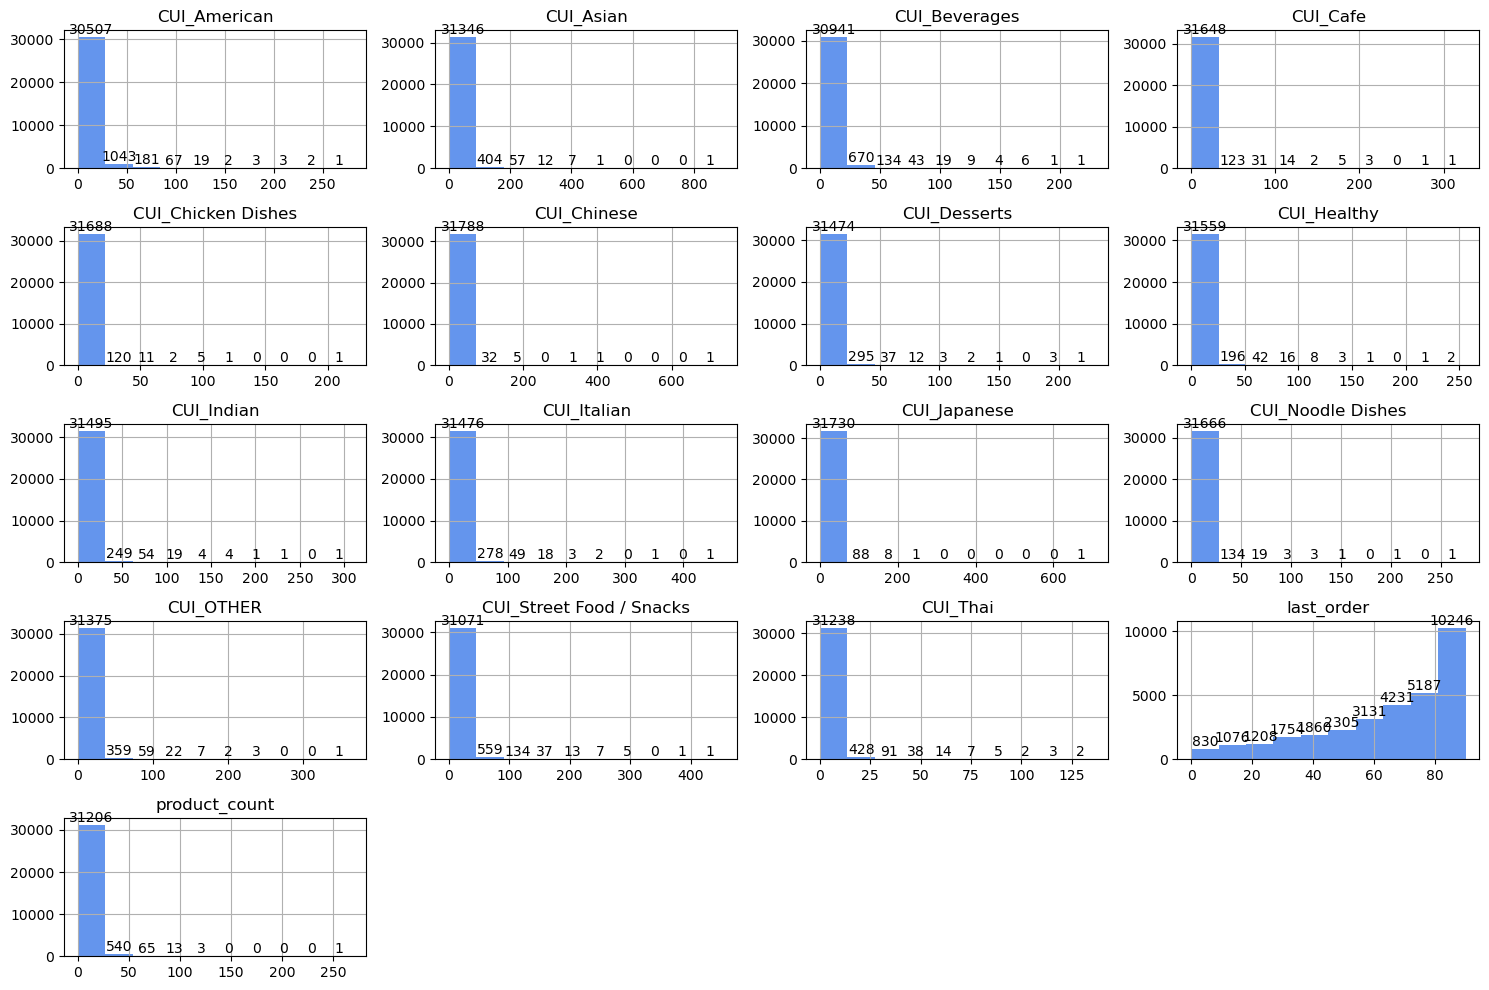

In [32]:
import matplotlib.pyplot as plt

# Plot the histograms for each column
axes = df_copy[['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
                'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
                'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai','last_order','product_count']].hist(color='cornflowerblue', figsize=(15, 10))

# Loop through each subplot
for ax in axes.flatten():
    for patch in ax.patches:
        # Get the height of each bar (the count)
        height = patch.get_height()
        # Place text above each bar
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
                f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Since almost every graph shows an outlier, let’s determine if this customer has high spending across all categories or if they differ significantly in specific Cui features

In [48]:
df_temp= df_copy[df_copy['CUI_Asian']>600]
df_temp[['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
                'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
                'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
249ba584d3,0.0,896.71,0.0,9.08,0.0,0.0,0.0,0.0,0.0,2.07,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_temp= df_copy[df_copy['CUI_American']>200]
df_temp[['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
                'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
                'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']]

In [49]:
df_temp= df_copy[df_copy['CUI_Chinese']>500]
df_temp[['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
                'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
                'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
92ced2dcb9,19.08,70.01,37.92,18.3,0.0,739.73,0.0,0.0,0.0,20.11,84.05,197.84,109.31,12.34,109.64


As we can see its different customers, so idk if we should remove.

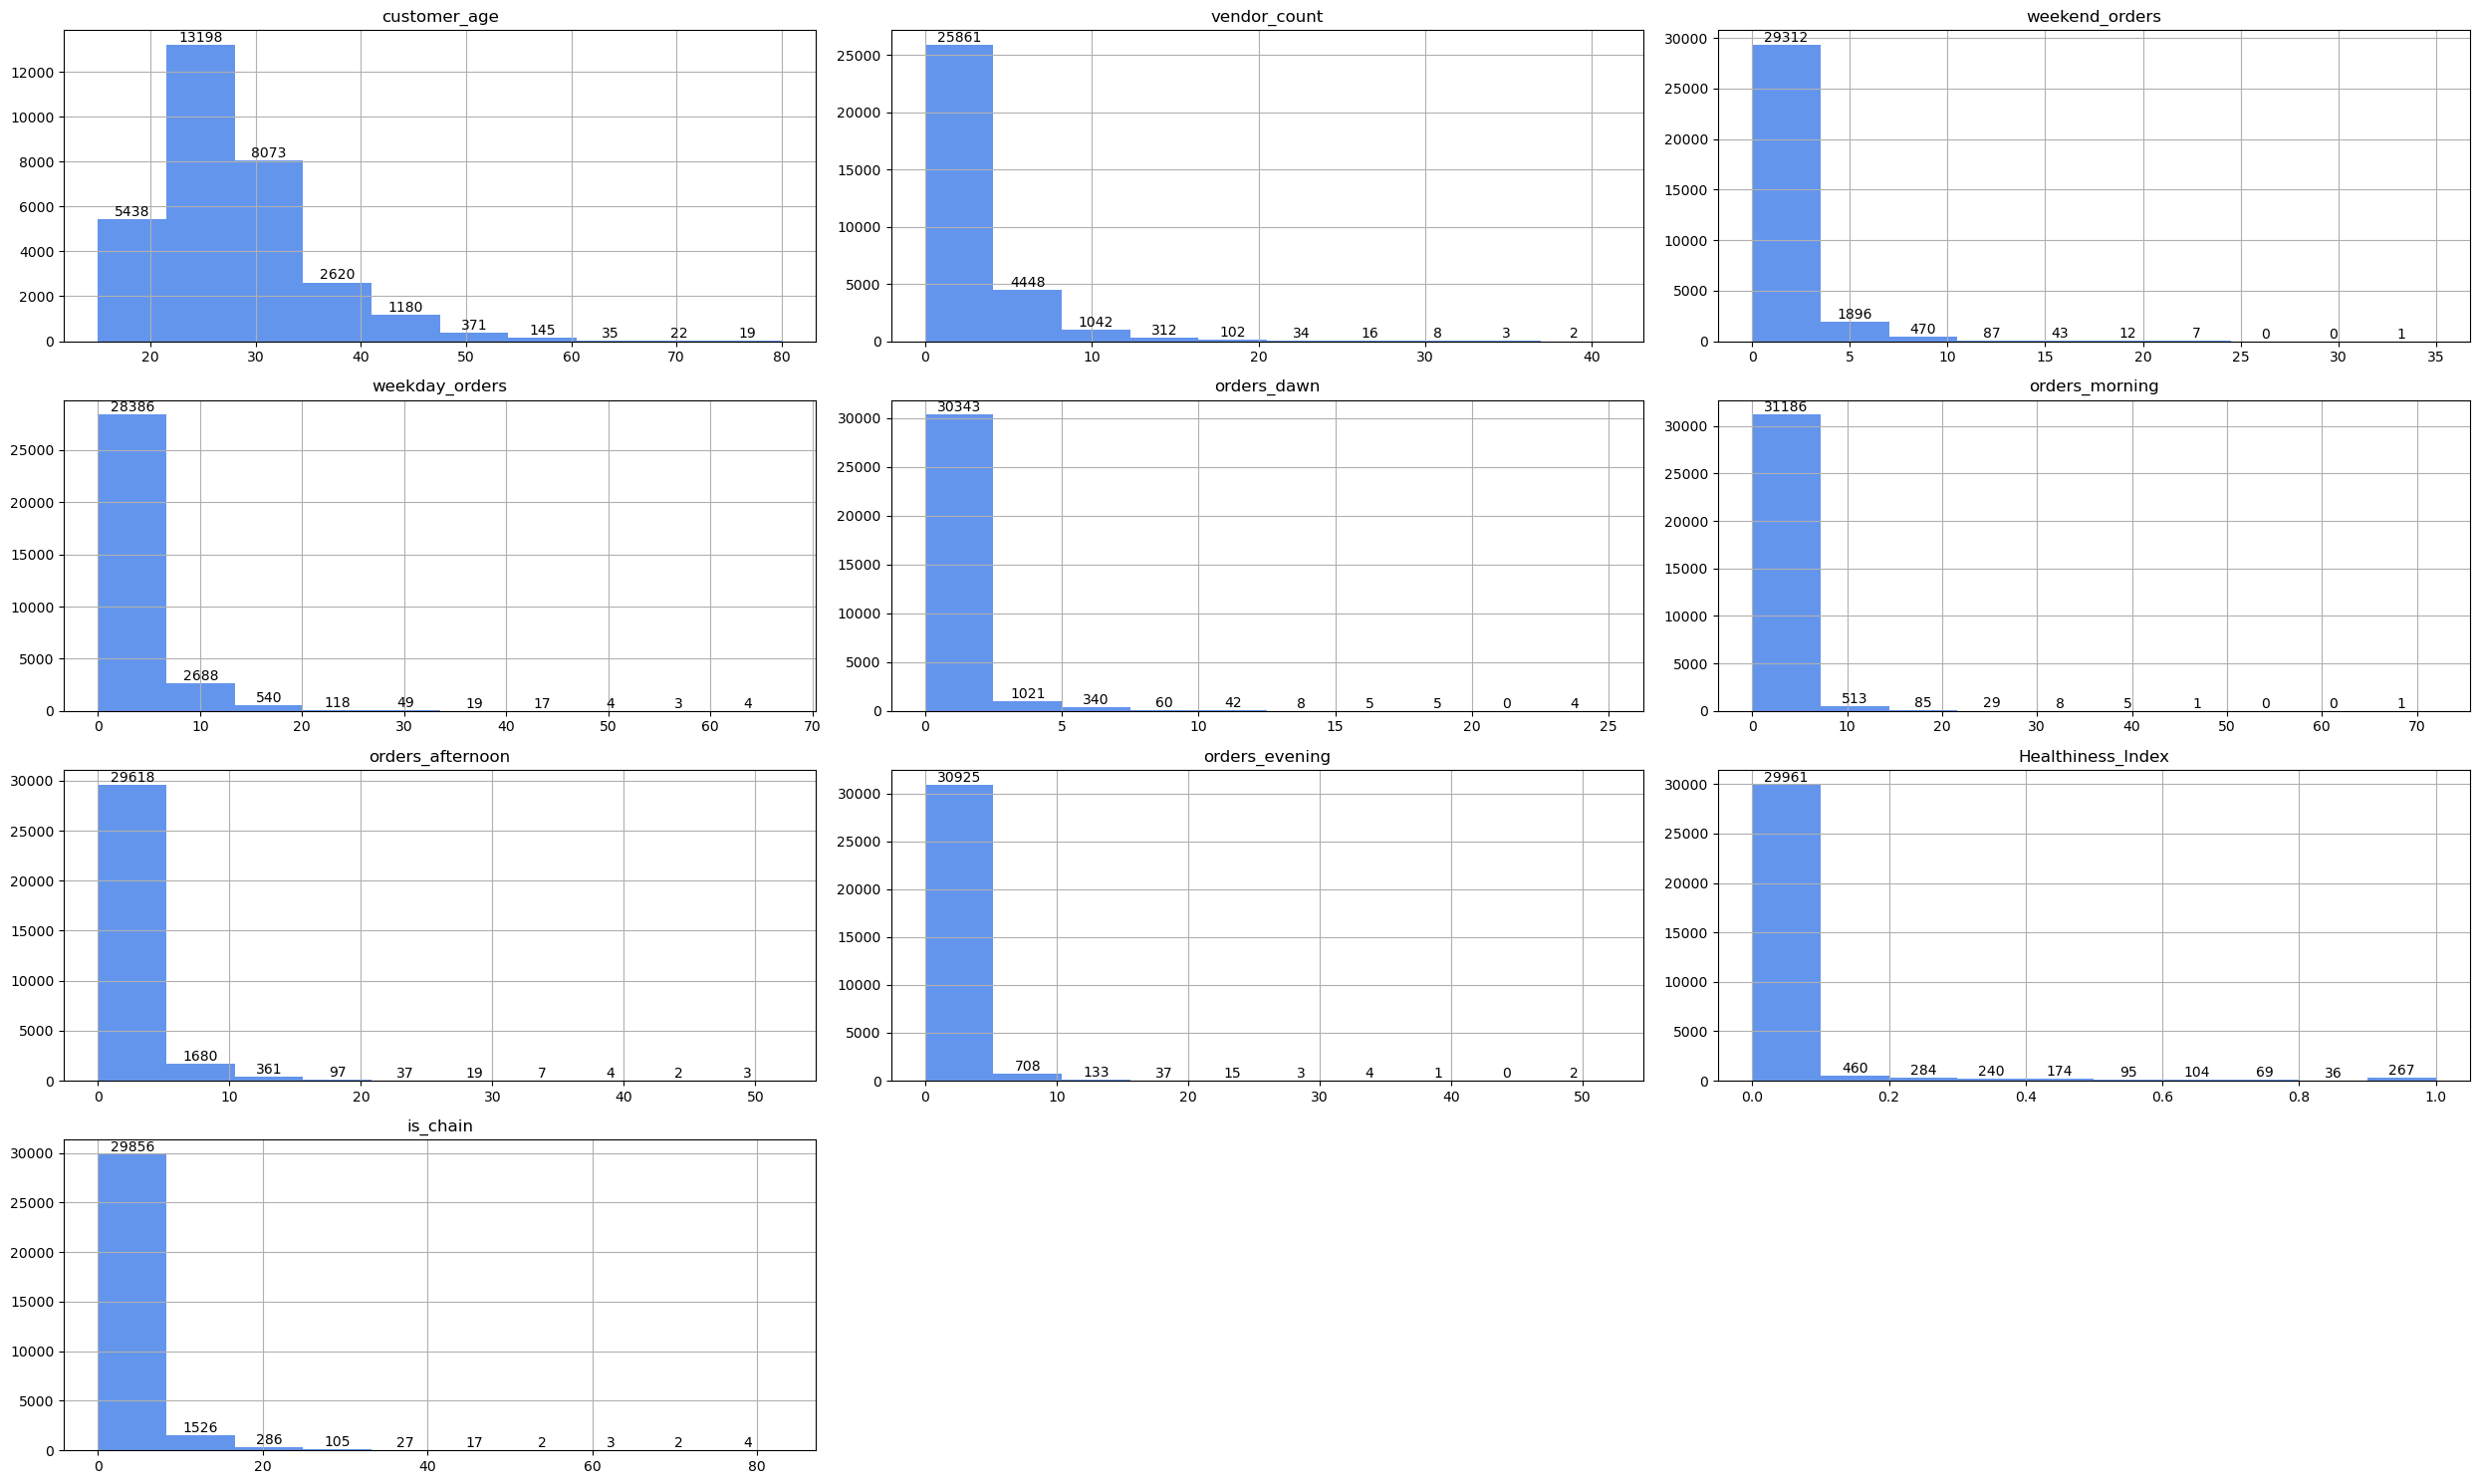

In [50]:
axes = df_copy[['customer_region', 'customer_age', 'vendor_count', 'weekend_orders', 'weekday_orders', 'orders_dawn','orders_morning', 'orders_afternoon', 'orders_evening',
       'Healthiness_Index','is_chain']].hist( color='cornflowerblue')

# Loop through each subplot
for ax in axes.flatten():
    for patch in ax.patches:
        # Get the height of each bar (the count)
        height = patch.get_height()
        # Place text above each bar
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
                f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [51]:
df_copy[df_copy['orders_morning']>50]

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,Total_Cui_Spending,weekend_orders,weekday_orders,generation,orders_dawn,orders_morning,orders_afternoon,orders_evening,Healthiness_Index,used_last_promo
customer_id,,,,,,,,,,,,,,,,,,,,,
e1491fb8f7,2360,17.0,2,75,75,2.0,89,FREEBIE,CARD,0.0,...,177.34,21,54,Gen_Z,0,72,2,1,0.0,1


In [34]:
df_copy.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Total_Cui_Spending',
       'weekend_orders', 'weekday_orders', 'generation', 'orders_dawn',
       'orders_morning', 'orders_afternoon', 'orders_evening',
       'Healthiness_Index', 'used_last_promo'],
      dtype='object')

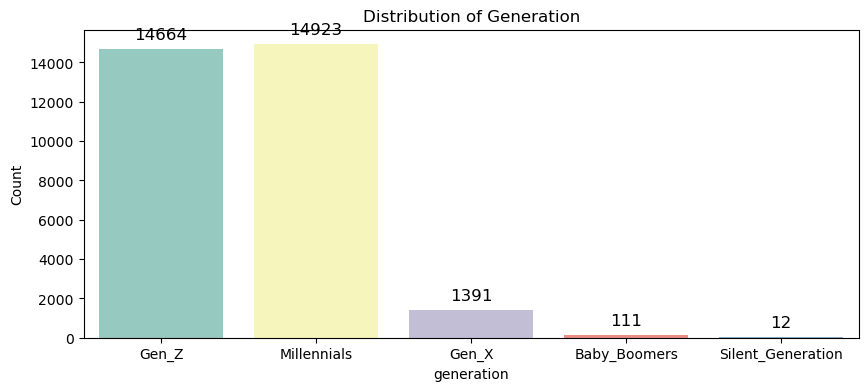

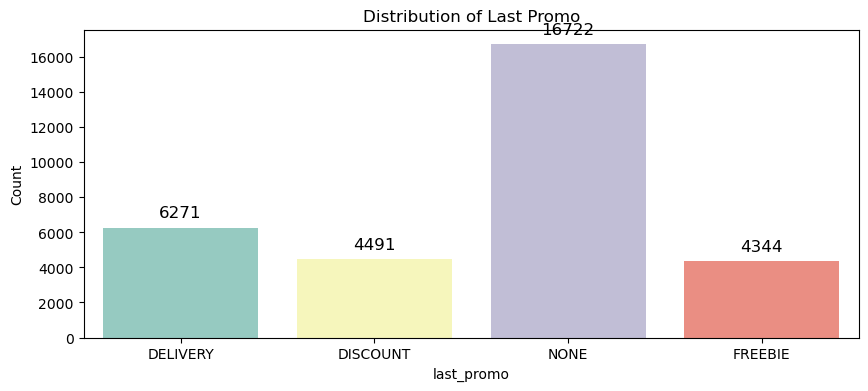

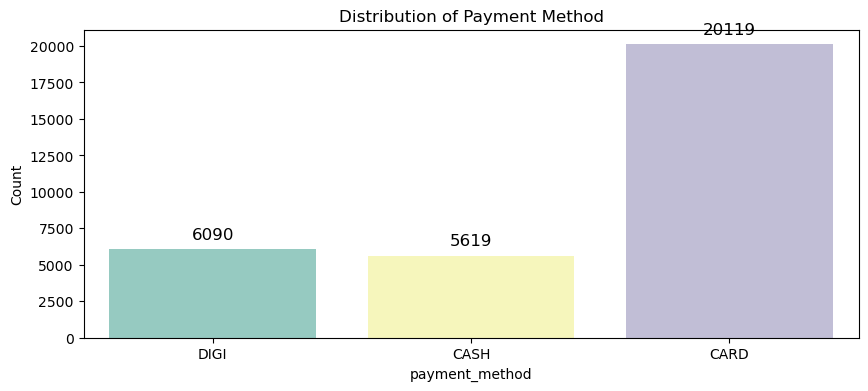

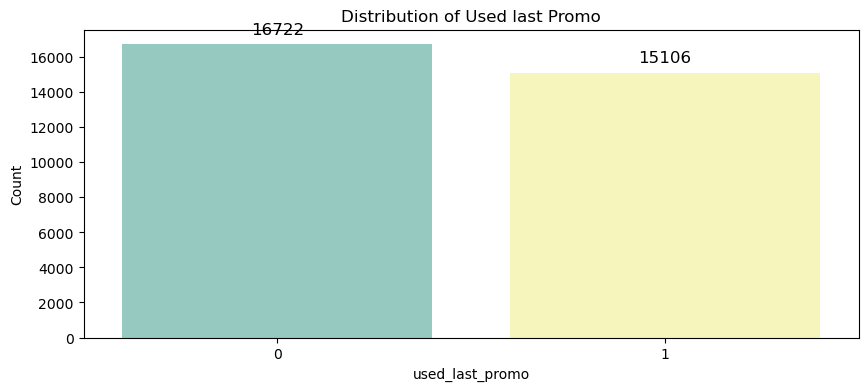

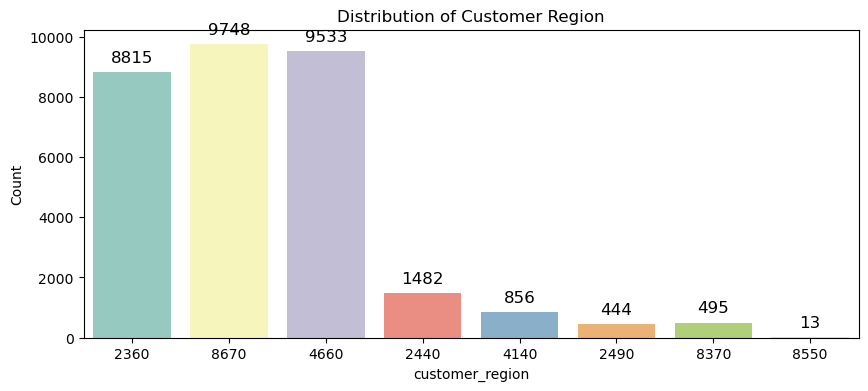

In [52]:
import seaborn as sns

# Function to create a bar plot with counts above each bar
def plot_bar_with_counts(column, title):
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df_copy, x=column, palette='Set3')
    plt.title(title)
    plt.ylabel('Count')
    
    # Add count annotations above each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.show()

# Plot bar charts with counts
plot_bar_with_counts('generation', 'Distribution of Generation')
plot_bar_with_counts('last_promo', 'Distribution of Last Promo')
plot_bar_with_counts('payment_method', 'Distribution of Payment Method')
plot_bar_with_counts('used_last_promo', 'Distribution of Used last Promo')
plot_bar_with_counts('customer_region', 'Distribution of Customer Region')


## 4.4. Correlation Matrix <a class="anchor" id="section_4_4"></a>
We use the correlation matrix to summarize the correlations between all variables in a dataset and to see the relationship between the features to check wether they're strongly correlated or not. <br> 
We use the ``Spearman's`` method to be able to see the relationships of the continous and discrete varible.

C:\Users\xandg\AppData\Local\Temp\ipykernel_15624\479739886.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy_reduced.corr()


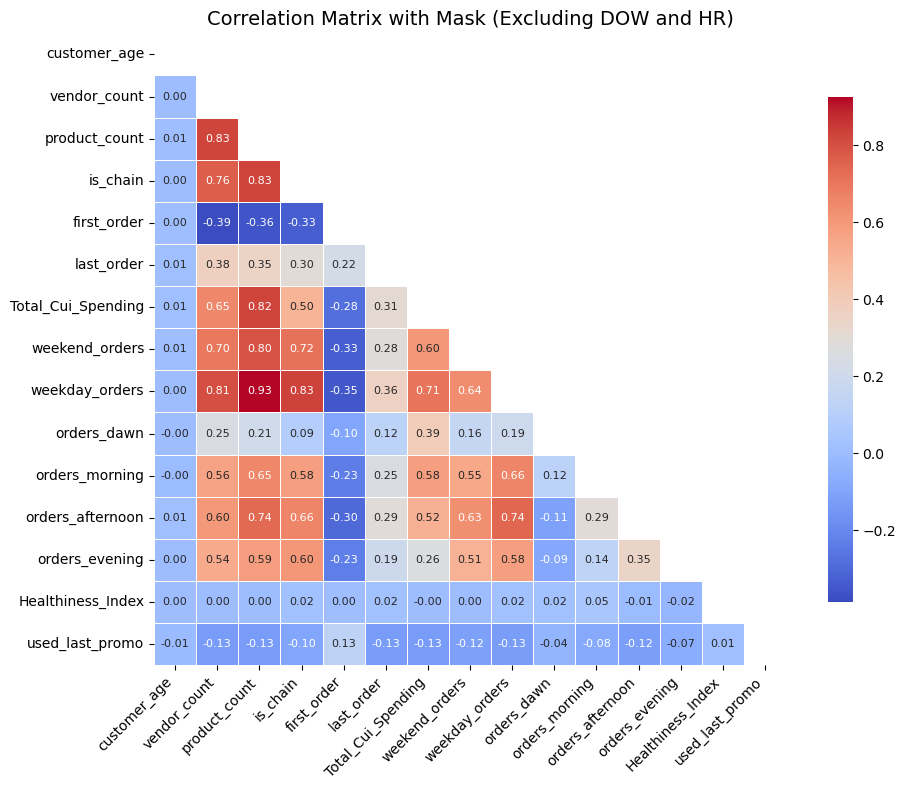

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


#Drop DOW and HR and CUI features
columns_to_drop = [col for col in df_copy.columns if 'DOW' in col or 'HR' in col or 'CUI' in col]
df_copy_reduced = df_copy.drop(columns=columns_to_drop)

# Standardize continuous features
continuous_features = df_copy_reduced.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df_copy_reduced[continuous_features] = scaler.fit_transform(df_copy_reduced[continuous_features])

correlation_matrix = df_copy_reduced.corr()

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))  # Adjusted figure size

sns.heatmap(correlation_matrix, 
            mask=mask,  
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            cbar_kws={"shrink": .8}, 
            linewidths=0.5,
            annot_kws={"size": 8})  

# Set the title with smaller font size
plt.title('Correlation Matrix with Mask (Excluding DOW and HR)', fontsize=14)  
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10)  

plt.tight_layout() 
plt.show()

C:\Users\xandg\AppData\Local\Temp\ipykernel_15624\3476785217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


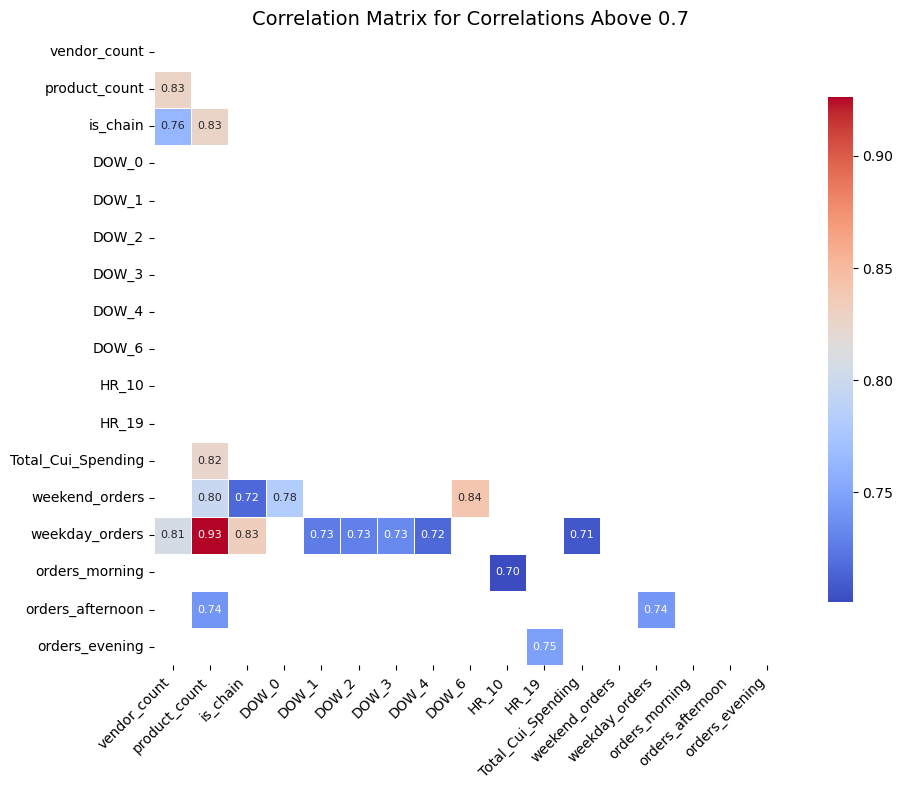

In [55]:
correlation_matrix = df_copy.corr()

# Compute the correlation matrix and filter for values above 0.7
high_correlation = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)]

# Drop rows and columns with all NaNs (since they don't have any correlations > 0.7)
filtered_corr = high_correlation.dropna(axis=0, how='all').dropna(axis=1, how='all')

mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

plt.figure(figsize=(10, 8))

sns.heatmap(filtered_corr, 
            mask=mask,  
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            cbar_kws={"shrink": .8}, 
            linewidths=0.5,
            annot_kws={"size": 8})

plt.title('Correlation Matrix for Correlations Above 0.7', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()
